### Visualization with Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides beautiful default styles and color palettes to make statistical plots more attractive.

For more details on seaborn [click on](https://seaborn.pydata.org/tutorial.html) the link.

In [38]:
# Importing intrinsic libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

In [39]:
# Create some data using random number generation
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)


### Difference between matplotlib vs seaborn

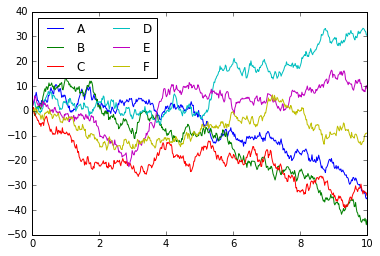

In [3]:
# Plot data using matplotlib
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.show()

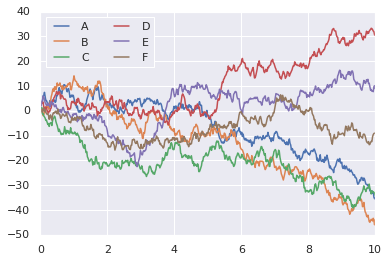

In [4]:
#Plot data using seaborn
sns.set() #Set the style by calling Seaborn's set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

One advantage of Seaborn is that it offers high-level instructions to construct a range of plot types useful for exploring statistical data and even some statistical model fitting.

## Plot Types
*  Histogram
* KDE plot
* Dist plot
* Join plot
* Pair Plot 
* Factor Plot
* Bar Plot




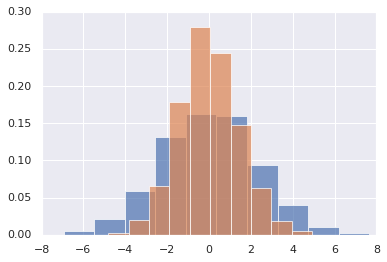

In [5]:
# For statistical data visualization, we want to plot histogram and distribution of variables 

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.7)

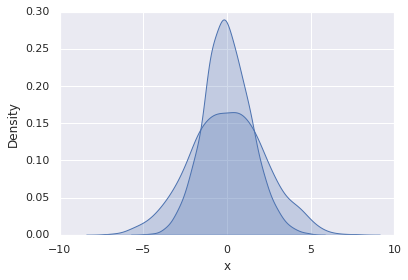

In [6]:

#Kernel density estimation using 'kdeplot'
for col in 'xy':
    sns.kdeplot(data[col], shade=True)    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


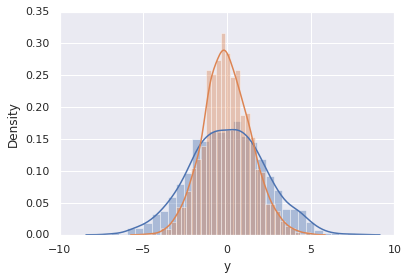

In [7]:
# Histograms and KDE combined plot using 'distplot'
sns.distplot(data['x'])
sns.distplot(data['y'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


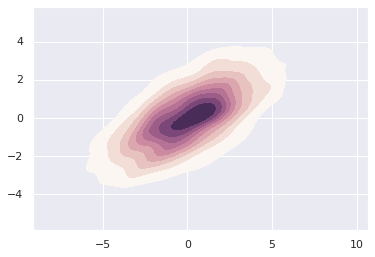

In [15]:
# Density Plot with Seaborn defaults
x, y= np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000).T
sample_cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=sample_cmap, shade=True)

## Joint Plots
Here I show an example the joint distribution between different datasets, along with the marginal distributions.

#Kind of plot to draw 

kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

Here I show two example with change the kind

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


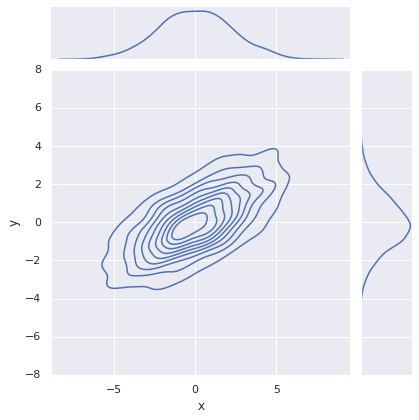

In [20]:

#Jointplot
with sns.axes_style('darkgrid'):
    sns.jointplot("x", "y", data, kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


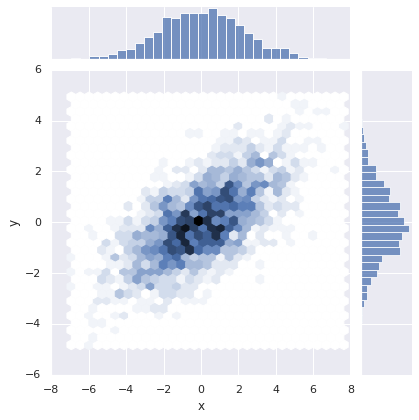

In [36]:
with sns.axes_style('darkgrid'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots
To hundle multidimensional data,we would like to plot all pairs of values agains each other.

Here I show an example with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species. \\
[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [23]:
iris = sns.load_dataset("iris") # Load the dataset 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


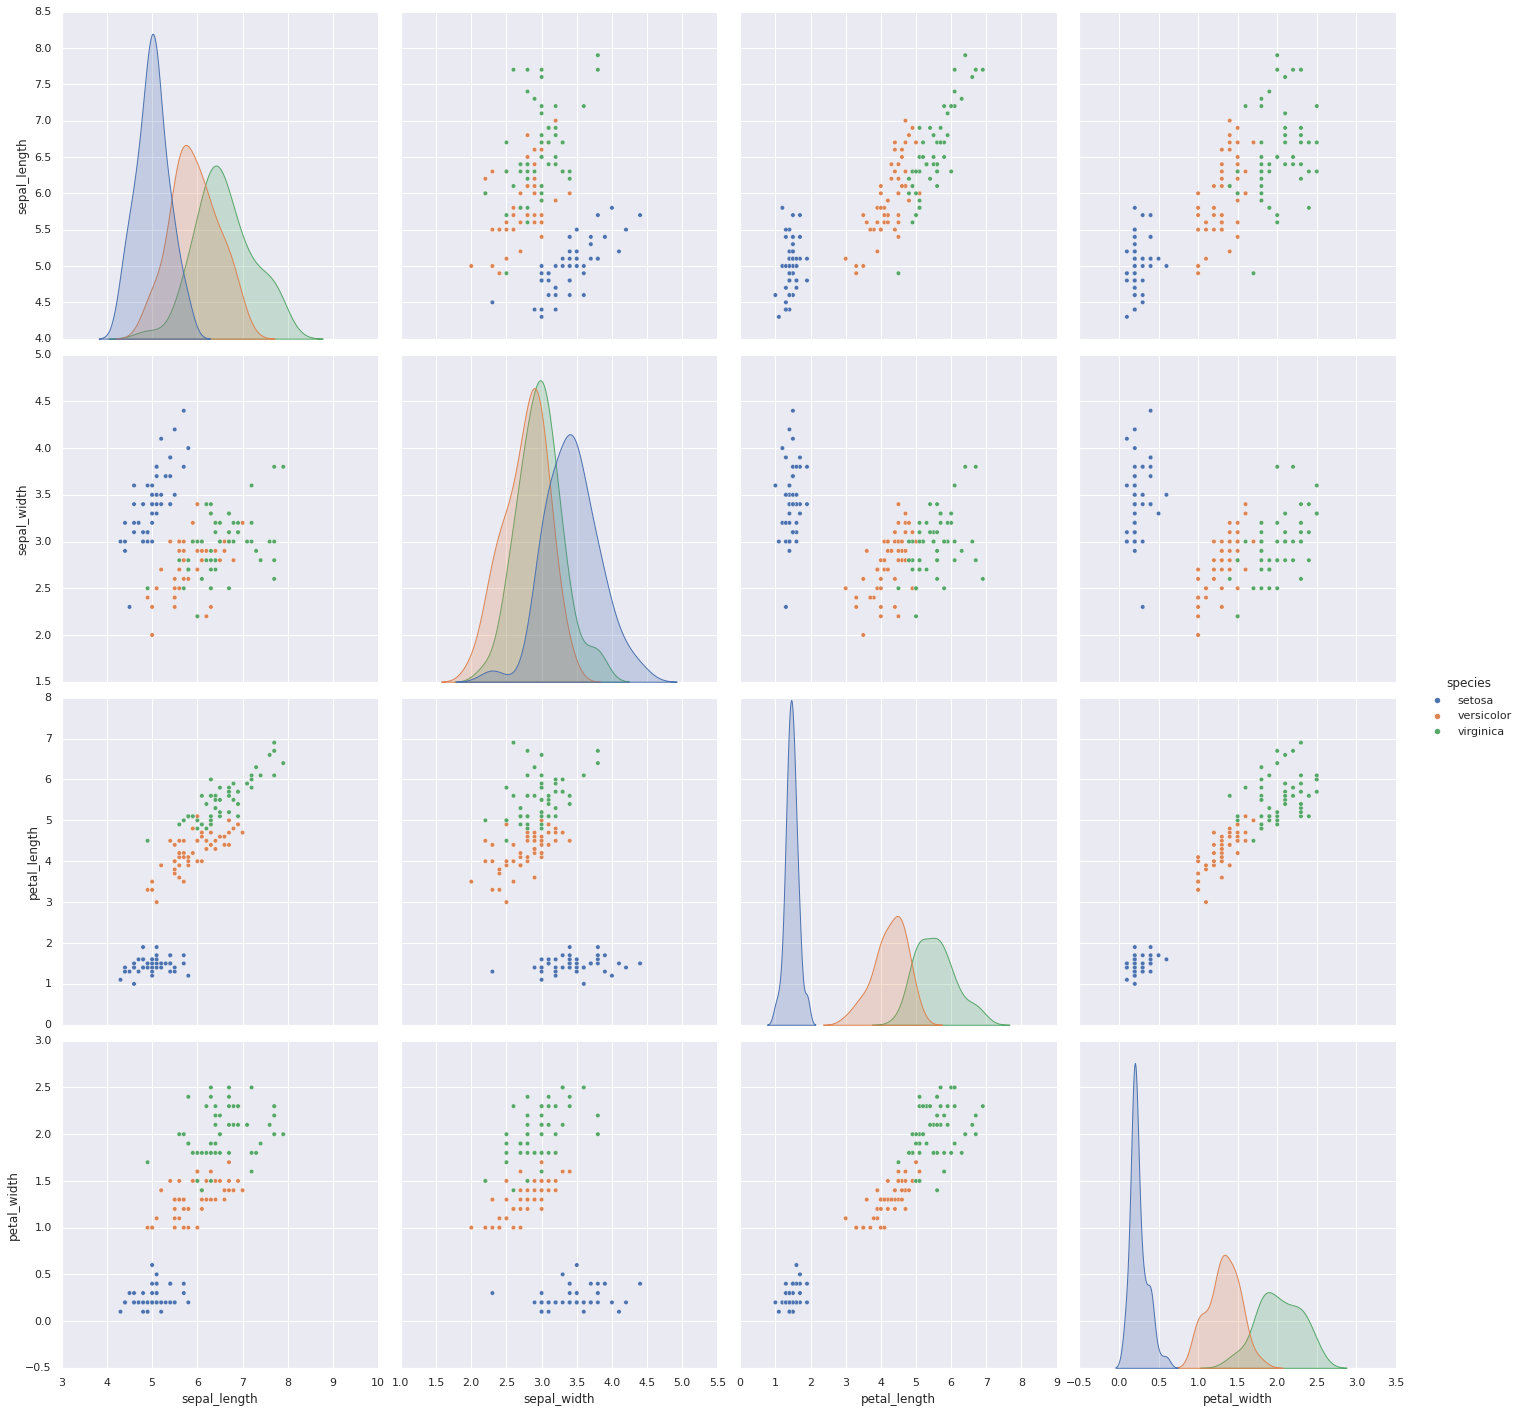

In [25]:
sns.pairplot(iris, hue='species', size=5)

# Factor Plots


In [27]:
tips = sns.load_dataset('tips')  # Load the data set
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


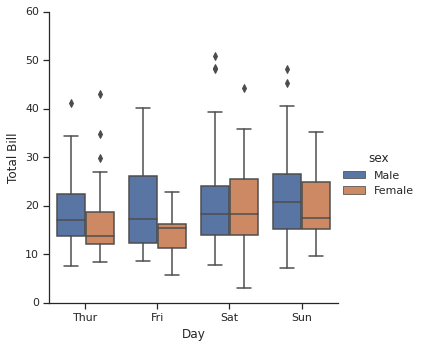

In [28]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

# Bar Plots
The height of each rectangle on a bar plot reflects an estimate of central tendency for a numerical variable, and error bars show the degree of uncertainty surrounding that estimate.

I show here an example with the previous dataset.


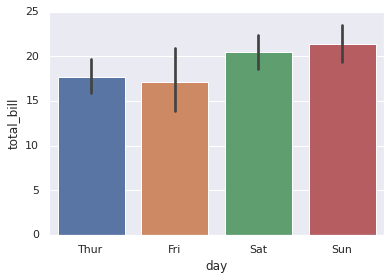

In [33]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

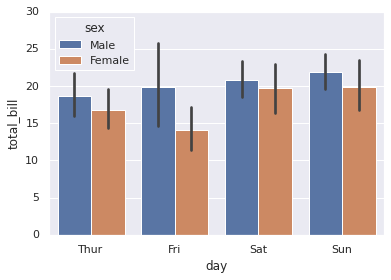

In [34]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)